In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math

/Users/thilina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = "data/crude oil data.csv"
df_crude = pd.read_csv(file_path)
df_crude

,date,Crude_oil_price
0,2001-01-02,27.29
1,2001-01-03,27.93
2,2001-01-04,27.95
3,2001-01-05,28.02
4,2001-01-08,27.44
...,...,...
5936,2023-10-04,84.32
5937,2023-10-05,82.30
5938,2023-10-06,82.83
5939,2023-10-09,NaN


In [3]:
df_crude = df_crude[df_crude['Crude_oil_price'] > 0]

In [4]:
def generate_calendar(year, drop_index=False):
    '''
    Simple function to generate a calendar containing
    US holidays, weekdays and  holiday weeks.
    '''
    from pandas.tseries.offsets import YearEnd
    from pandas.tseries.holiday import USFederalHolidayCalendar

    start_date = pd.to_datetime('1/1/'+str(year))
    end_date = start_date + YearEnd()
    DAT = pd.date_range(str(start_date), str(end_date), freq='D')
    MO = [d.strftime('%B') for d in DAT]
    holidays = USFederalHolidayCalendar().holidays(start=start_date, end=end_date)

    cal_df = pd.DataFrame({'date':DAT, 'month':MO})
    cal_df['year'] = [format(d, '%Y') for d in DAT]
    cal_df['weekday'] = [format(d, '%A') for d in DAT]
    cal_df['is_weekday'] = cal_df.weekday.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
    cal_df['is_weekday'] = cal_df['is_weekday'].astype(int)
    cal_df['is_holiday'] = cal_df['date'].isin(holidays)
    cal_df['is_holiday'] = cal_df['is_holiday'].astype(int)
    cal_df['is_holiday_week'] = cal_df.is_holiday.rolling(window=7,center=True,min_periods=1).sum()
    cal_df['is_holiday_week'] = cal_df['is_holiday_week'].astype(int)

    if not drop_index: cal_df.set_index('date', inplace=True)

    return cal_df

def make_calendars(year_list, drop_index):
    cal_df = pd.DataFrame()
    for year in year_list:
        cal_df = pd.concat([cal_df, generate_calendar(year, drop_index=drop_index)])
#         cal_df = cal_df.append(generate_calendar(year, drop_index=drop_index))
    return cal_df

year_list = [str(int(i)) for i in np.arange(2001, 2024)]
cal_df = make_calendars(year_list, drop_index=False)
cal_df = cal_df.reset_index()
cal_df

,date,month,year,weekday,is_weekday,is_holiday,is_holiday_week
0,2001-01-01,January,2001,Monday,1,1,1
1,2001-01-02,January,2001,Tuesday,1,0,1
2,2001-01-03,January,2001,Wednesday,1,0,1
3,2001-01-04,January,2001,Thursday,1,0,1
4,2001-01-05,January,2001,Friday,1,0,0
...,...,...,...,...,...,...,...
8395,2023-12-27,December,2023,Wednesday,1,0,1
8396,2023-12-28,December,2023,Thursday,1,0,1
8397,2023-12-29,December,2023,Friday,1,0,0
8398,2023-12-30,December,2023,Saturday,0,0,0


In [5]:
df_crude['date'] = pd.to_datetime(df_crude['date'])

/var/folders/27/gbz_5drj4l13l6x8mnk54j1w0000gn/T/ipykernel_15651/1243677546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crude['date'] = pd.to_datetime(df_crude['date'])


In [6]:
df_crude = df_crude.merge(cal_df, on = 'date', how='outer')
df_crude

,date,Crude_oil_price,month,year,weekday,is_weekday,is_holiday,is_holiday_week
0,2001-01-01,NaN,January,2001,Monday,1,1,1
1,2001-01-02,27.29,January,2001,Tuesday,1,0,1
2,2001-01-03,27.93,January,2001,Wednesday,1,0,1
3,2001-01-04,27.95,January,2001,Thursday,1,0,1
4,2001-01-05,28.02,January,2001,Friday,1,0,0
...,...,...,...,...,...,...,...,...
8395,2023-12-27,NaN,December,2023,Wednesday,1,0,1
8396,2023-12-28,NaN,December,2023,Thursday,1,0,1
8397,2023-12-29,NaN,December,2023,Friday,1,0,0
8398,2023-12-30,NaN,December,2023,Saturday,0,0,0


In [7]:
df_crude = df_crude.sort_values(by='date', ascending=True)
df_crude = df_crude.reset_index()
df_crude = df_crude.drop(columns = 'index')
df_crude

,date,Crude_oil_price,month,year,weekday,is_weekday,is_holiday,is_holiday_week
0,2001-01-01,NaN,January,2001,Monday,1,1,1
1,2001-01-02,27.29,January,2001,Tuesday,1,0,1
2,2001-01-03,27.93,January,2001,Wednesday,1,0,1
3,2001-01-04,27.95,January,2001,Thursday,1,0,1
4,2001-01-05,28.02,January,2001,Friday,1,0,0
...,...,...,...,...,...,...,...,...
8395,2023-12-27,NaN,December,2023,Wednesday,1,0,1
8396,2023-12-28,NaN,December,2023,Thursday,1,0,1
8397,2023-12-29,NaN,December,2023,Friday,1,0,0
8398,2023-12-30,NaN,December,2023,Saturday,0,0,0


In [8]:
df_crude = df_crude.fillna(method='bfill')
df_crude = df_crude.fillna(method='ffill')
df_crude

/var/folders/27/gbz_5drj4l13l6x8mnk54j1w0000gn/T/ipykernel_15651/3008219961.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_crude = df_crude.fillna(method='bfill')
/var/folders/27/gbz_5drj4l13l6x8mnk54j1w0000gn/T/ipykernel_15651/3008219961.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_crude = df_crude.fillna(method='ffill')


,date,Crude_oil_price,month,year,weekday,is_weekday,is_holiday,is_holiday_week
0,2001-01-01,27.29,January,2001,Monday,1,1,1
1,2001-01-02,27.29,January,2001,Tuesday,1,0,1
2,2001-01-03,27.93,January,2001,Wednesday,1,0,1
3,2001-01-04,27.95,January,2001,Thursday,1,0,1
4,2001-01-05,28.02,January,2001,Friday,1,0,0
...,...,...,...,...,...,...,...,...
8395,2023-12-27,85.89,December,2023,Wednesday,1,0,1
8396,2023-12-28,85.89,December,2023,Thursday,1,0,1
8397,2023-12-29,85.89,December,2023,Friday,1,0,0
8398,2023-12-30,85.89,December,2023,Saturday,0,0,0


In [9]:
start_date = '2001-01-02'
end_date = '2023-10-10'

# Select rows where the date is within the date range
df_crude = df_crude[(df_crude['date'] >= start_date) & (df_crude['date'] <= end_date)]
df_crude = df_crude.reset_index()
df_crude = df_crude.drop(columns = 'index')
df_crude = df_crude[['date','Crude_oil_price']]
# df_crude = df_crude.head(500)
df_crude

,date,Crude_oil_price
0,2001-01-02,27.29
1,2001-01-03,27.93
2,2001-01-04,27.95
3,2001-01-05,28.02
4,2001-01-06,27.44
...,...,...
8312,2023-10-06,82.83
8313,2023-10-07,85.89
8314,2023-10-08,85.89
8315,2023-10-09,85.89


In [10]:
df_crude_index = df_crude.set_index('date')
df_crude_index

,Crude_oil_price
date,
2001-01-02,27.29
2001-01-03,27.93
2001-01-04,27.95
2001-01-05,28.02
2001-01-06,27.44
...,...
2023-10-06,82.83
2023-10-07,85.89
2023-10-08,85.89


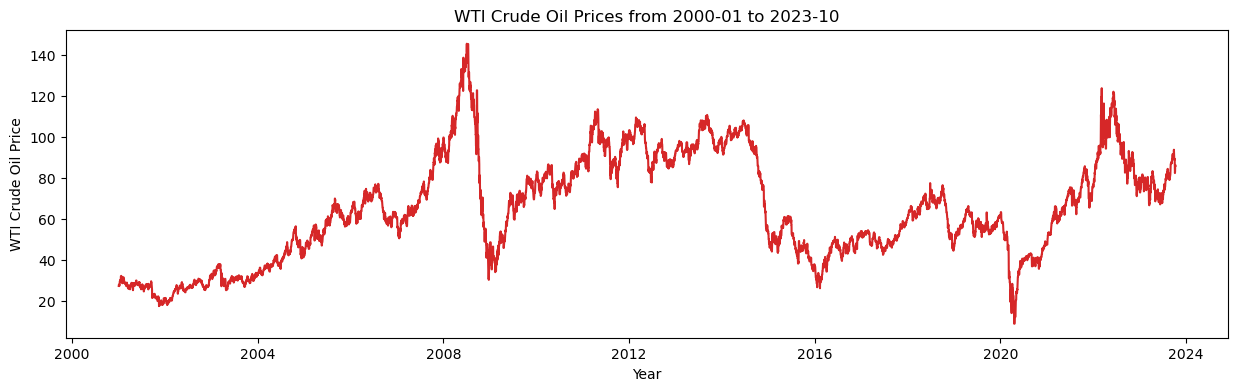

In [11]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='WTI Crude Oil Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df_crude, x=df_crude['date'], y=df_crude['Crude_oil_price'], title='WTI Crude Oil Prices from 2000-01 to 2023-10')

## MWPF 

In [12]:
# Calculate mean and standard deviation
mean_price = df_crude['Crude_oil_price'].mean()
std_dev = df_crude['Crude_oil_price'].std()
print('Mean Price: ', mean_price)
print('Standard Deviation: ', std_dev)

Mean Price:  64.44774317662618
Standard Deviation:  25.501856663442354


In [13]:
# Set the window width and confidence interval multiplier
window_width = 4 * 7  # 4 weeks
confidence_interval_multiplier = 1.96

In [14]:
def moving_window_filter(data, window_width, confidence_interval_multiplier):
    result = []

    # Iterate over windows
    for i in range(0, len(data), window_width):
        window_data = data[i:i + window_width]

        # Calculate mean and standard deviation for the window
        window_mean = window_data['Crude_oil_price'].mean()
        window_std = window_data['Crude_oil_price'].std()

        # Apply filter using 95% confidence interval
        spikes = np.abs(window_data['Crude_oil_price'] - window_mean) >= confidence_interval_multiplier * window_std
        
        # Append boolean values to the result
        result.extend(spikes)

    return pd.Series(result, index=data.index, name='Crude_oil_price_outlier')

In [15]:
# Apply the Moving Window Filter to the dataset
outliers = moving_window_filter(df_crude, window_width, confidence_interval_multiplier)
num_outliers = outliers.sum()
print(num_outliers)

219


### Mean Replacement

In [16]:
df_MEAN = df_crude.copy()

# Create a column for the two-month period
df_MEAN['two_month_period'] = (df_MEAN['date'].dt.year * 12 + df_MEAN['date'].dt.month - 1) // 2
df_MEAN['two_month_mean'] = df_MEAN.groupby('two_month_period')['Crude_oil_price'].transform('mean')
df_MEAN.loc[outliers, 'Crude_oil_price'] = df_MEAN.loc[outliers, 'two_month_mean']
df_MEAN = df_MEAN.drop(columns=['two_month_period', 'two_month_mean'])

In [17]:
# Calculate mean and standard deviation
mean_price = df_MEAN['Crude_oil_price'].mean()
std_dev = df_MEAN['Crude_oil_price'].std()
print('New Mean Price after Mean Replacement: ', mean_price)
print('New Standard Deviation after Mean Replacement: ', std_dev)

New Mean Price after Mean Replacement:  64.44354716689773
New Standard Deviation after Mean Replacement:  25.477220373851875


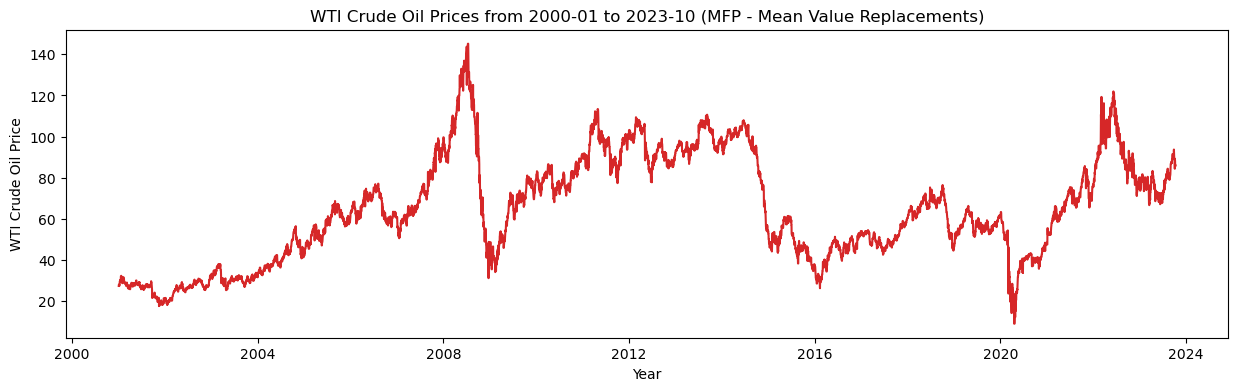

In [18]:
plot_df(df_MEAN, x=df_MEAN['date'], y=df_MEAN['Crude_oil_price'], 
        title='WTI Crude Oil Prices from 2000-01 to 2023-10 (MFP - Mean Value Replacements)')

In [19]:
df_MEAN.to_csv('data/MWPF_Mean_Replacements.csv' , index = False)

### Median Replacement

In [19]:
df_MEDIAN = df_crude.copy()

# Create a column for the two-month period
df_MEDIAN['two_month_period'] = (df_MEDIAN['date'].dt.year * 12 + df_MEDIAN['date'].dt.month - 1) // 2
df_MEDIAN['two_month_medain'] = df_MEDIAN.groupby('two_month_period')['Crude_oil_price'].transform('median')
df_MEDIAN.loc[outliers, 'Crude_oil_price'] = df_MEDIAN.loc[outliers, 'two_month_medain']
df_MEDIAN = df_MEDIAN.drop(columns=['two_month_period', 'two_month_medain'])

In [20]:
# Calculate mean and standard deviation
mean_price = df_MEDIAN['Crude_oil_price'].mean()
std_dev = df_MEDIAN['Crude_oil_price'].std()
print('New Mean Price after Median Replacement: ', mean_price)
print('New Standard Deviation after Median Replacement: ', std_dev)

New Mean Price after Median Replacement:  64.44080197186486
New Standard Deviation after Median Replacement:  25.47625409398401


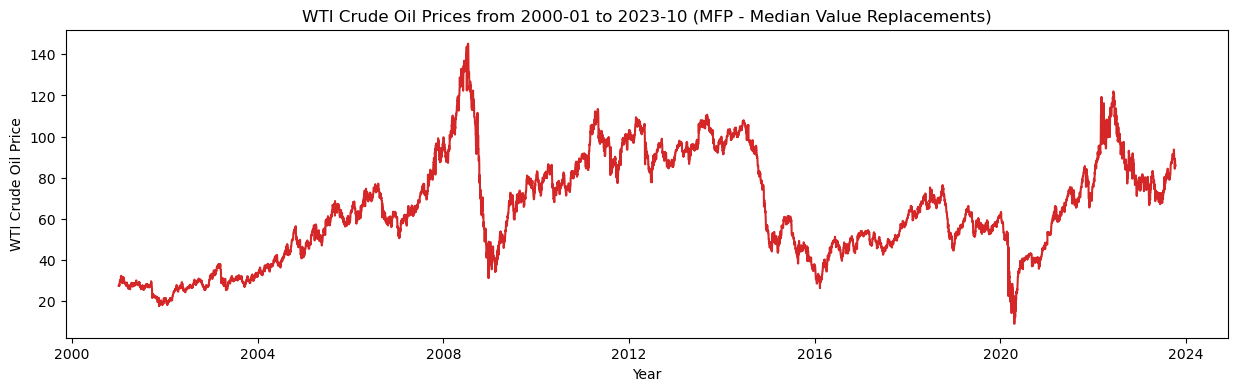

In [21]:
plot_df(df_MEDIAN, x=df_MEDIAN['date'], y=df_MEDIAN['Crude_oil_price'], 
        title='WTI Crude Oil Prices from 2000-01 to 2023-10 (MFP - Median Value Replacements)')

In [23]:
df_MEDIAN.to_csv('data/MWPF_Median_Replacements.csv' , index = False)

### Damping Replacement 

In [22]:
df_DAMPING = df_crude.copy()

In [23]:
Y1 = mean_price
df_DAMPING.loc[outliers, 'Crude_oil_price'] = Y1 + Y1 * np.log10(df_DAMPING.loc[outliers, 'Crude_oil_price'] / Y1)

In [24]:
# Calculate mean and standard deviation
mean_price = df_DAMPING['Crude_oil_price'].mean()
std_dev = df_DAMPING['Crude_oil_price'].std()
print('New Mean Price after Damping Replacement: ', mean_price)
print('New Standard Deviation after Damping Replacement: ', std_dev)

New Mean Price after Damping Replacement:  64.34537893151835
New Standard Deviation after Damping Replacement:  25.196589360361223


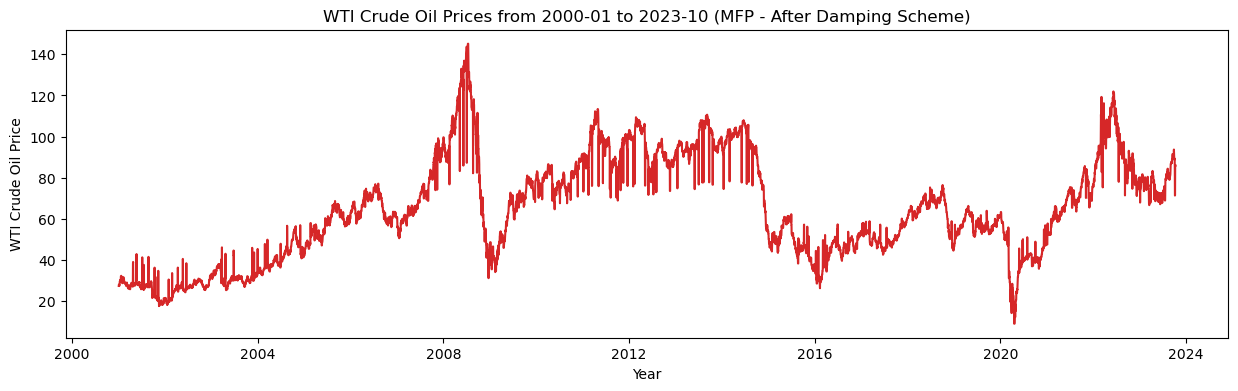

In [25]:
plot_df(df_DAMPING, x=df_DAMPING['date'], y=df_DAMPING['Crude_oil_price'], 
        title='WTI Crude Oil Prices from 2000-01 to 2023-10 (MFP - After Damping Scheme)')

In [28]:
df_DAMPING.to_csv('data/MWPF_Damping_Scheme_Replacements.csv' , index = False)

### Threshold Replacement 

In [26]:
df_THRESHOLD = df_crude.copy()

In [27]:
# Create a column for the two-month period
df_THRESHOLD['two_month_period'] = (df_THRESHOLD['date'].dt.year * 12 + df_THRESHOLD['date'].dt.month - 1) // 2
df_THRESHOLD['two_month_mean'] = df_THRESHOLD.groupby('two_month_period')['Crude_oil_price'].transform('mean')
df_THRESHOLD['two_month_median'] = df_THRESHOLD.groupby('two_month_period')['Crude_oil_price'].transform('median')
df_THRESHOLD['mean_median_avg'] = (df_THRESHOLD['two_month_mean'] + df_THRESHOLD['two_month_median']) / 2
df_THRESHOLD.loc[outliers, 'Crude_oil_price'] = df_THRESHOLD.loc[outliers, 'mean_median_avg']
df_THRESHOLD = df_THRESHOLD.drop(columns=['two_month_period', 'two_month_mean', 'two_month_median', 'mean_median_avg'])

In [28]:
# Calculate mean and standard deviation
mean_price = df_THRESHOLD['Crude_oil_price'].mean()
std_dev = df_THRESHOLD['Crude_oil_price'].std()
print('New Mean Price after threshold Replacement: ', mean_price)
print('New Standard Deviation after threshold Replacement: ', std_dev)

New Mean Price after threshold Replacement:  64.4421745693813
New Standard Deviation after threshold Replacement:  25.476608939217677


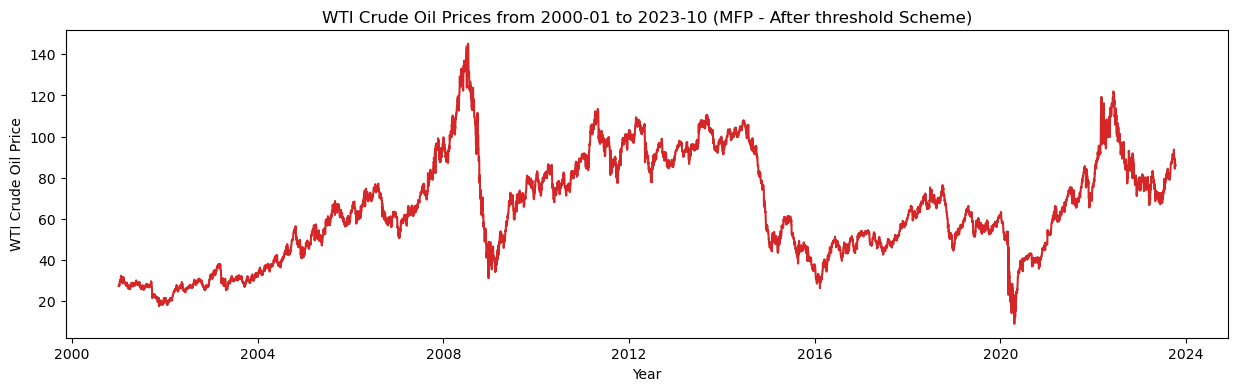

In [29]:
plot_df(df_THRESHOLD, x=df_THRESHOLD['date'], y=df_THRESHOLD['Crude_oil_price'], 
        title='WTI Crude Oil Prices from 2000-01 to 2023-10 (MFP - After threshold Scheme)')

In [33]:
df_THRESHOLD.to_csv('data/MWPF_threshold_Scheme_Replacements.csv' , index = False)